In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

In [3]:
print(train.head())


   id      f_00      f_01      f_02      f_03      f_04      f_05      f_06  \
0   0 -1.373246  0.238887 -0.243376  0.567405 -0.647715  0.839326  0.113133   
1   1  1.697021 -1.710322 -2.230332 -0.545661  1.113173 -1.552175  0.447825   
2   2  1.681726  0.616746 -1.027689  0.810492 -0.609086  0.113965 -0.708660   
3   3 -0.118172 -0.587835 -0.804638  2.086822  0.371005 -0.128831 -0.282575   
4   4  1.148481 -0.176567 -0.664871 -1.101343  0.467875  0.500117  0.407515   

   f_07  f_08  ...      f_22      f_23      f_24      f_25      f_26  \
0     1     5  ... -2.540739  0.766952 -2.730628 -0.208177  1.363402   
1     1     3  ...  2.278315 -0.633658 -1.217077 -3.782194 -0.058316   
2     1     0  ... -1.385775 -0.520558 -0.009121  2.788536 -3.703488   
3     3     2  ...  0.572594 -1.653213  1.686035 -2.533098 -0.608601   
4     3     3  ... -3.912929 -1.430366  2.127649 -3.306784  4.371371   

         f_27        f_28  f_29  f_30  target  
0  ABABDADBAB   67.609153     0     0       

In [4]:
print(test.head())


       id      f_00      f_01      f_02      f_03      f_04      f_05  \
0  900000  0.442517  0.174380 -0.999816  0.762741  0.186778 -1.074775   
1  900001 -0.605598 -0.305715  0.627667 -0.578898 -1.750931  1.355550   
2  900002  0.303990  2.445110  0.246515  0.818248  0.359731 -1.331845   
3  900003  0.154053  0.260126 -1.367092 -0.093175 -1.111034 -0.948481   
4  900004 -1.651904 -0.424266 -0.667356 -0.322124 -0.089462  0.181705   

       f_06  f_07  f_08  ...      f_21      f_22      f_23      f_24  \
0  0.501888     6     6  ... -1.006400 -1.193879 -2.435736 -2.427430   
1 -0.190911     1     3  ...  2.382405  0.149442  1.883322 -2.848714   
2  1.358622     3     3  ... -7.026098  1.312277 -5.157192  1.714005   
3  1.119220     0     0  ... -0.594532 -3.939475  1.754570 -2.364007   
4  1.784983     2     2  ...  0.084906 -0.985736 -0.130467 -3.557893   

       f_25      f_26        f_27        f_28  f_29  f_30  
0 -1.966887  5.734205  BAAABADLAC   99.478419     0     0  
1 -0.725

In [5]:
del train['id']
del train['f_27']

# del test['id']
del test['f_27']

In [6]:
# Separating Target & Other Columns
X = train.drop(columns=['target'])
y = train['target']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=20)
}

# best we got

In [117]:
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=5, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print('Train Accuracy : %.3f'%nbModel_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%nbModel_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%nbModel_grid.best_score_)
print('Best Parameters : ',nbModel_grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Train Accuracy : 0.626
Test Accuracy : 0.626
Best Accuracy Through Grid Search : 0.626
Best Parameters :  {'var_smoothing': 8.858667904100832e-09}


In [103]:
y_pred = nbModel_grid.predict(X_test)
print(y_pred)

[1 1 0 ... 1 0 1]


In [104]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

[[61639 30651]
 [36591 51119]] : is the confusion matrix
0.6264333333333333 : is the accuracy score
0.6251559251559251 : is the precision score
0.5828183787481473 : is the recall score
0.603245220675006 : is the f1 score


In [105]:
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=6)
nav_mean = nav_scores.mean()
print('Naive Bayes Accuracy after CV: ',nav_mean)

Naive Bayes Accuracy after CV:  0.6257888888888888


In [107]:
NamishCSVTest = test[['id']]


In [108]:
NamishCSVTest


,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [109]:
predT = test.drop(columns=['id'])

In [110]:
predT.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30
0,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,0,...,2.749347,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,99.478419,0,0
1,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,4,...,1.080762,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,-65.993825,1,0
2,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,4,...,-1.406712,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,-87.405622,0,1
3,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,4,...,3.011085,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,-281.293460,0,0
4,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,2,...,0.100594,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,25.629415,0,2


In [111]:
predictionOnTest = classifier.predict(predT)


In [112]:

NamishCSVTest['target'] = predictionOnTest


In [113]:
NamishCSVTest.head()


,id,target
0,900000,0
1,900001,1
2,900002,1
3,900003,0
4,900004,0


In [129]:
NamishCSVTest.to_csv('NamishTestCSV.csv', index=False)


# the more we reducing the more we are having less accuracies this is just one example I had tried alot 

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=3, n_jobs=10)
nbModel_grid.fit(X_train, y_train)
print('Train Accuracy : %.3f'%nbModel_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%nbModel_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%nbModel_grid.best_score_)
print('Best Parameters : ',nbModel_grid.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Train Accuracy : 0.513
Test Accuracy : 0.514
Best Accuracy Through Grid Search : 0.513
Best Parameters :  {'var_smoothing': 100.0}


#  Picture of an example:

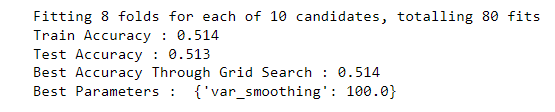# 